In [1]:
#Import tensorflow and keras
import tensorflow as tf
from tensorflow import keras

In [2]:
#Check the tensorflow version after importing
print(tf.__version__)

2.0.0-rc0


In [3]:
#Import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
#Load the MNIST Fashion dataset
mnist=keras.datasets.fashion_mnist

In [5]:
#Check the type of the dataset that was obtained in previous step
type(mnist)

tensorflow.python.util.module_wrapper.TFModuleWrapper

In [6]:
#Load this data into the noteboot
#This will be loaded as two Tuples by default
#One Tuple will be Training Dataset--- we name it as (X_train,y_train)
#Second Tuple will be Test Dataset---- we name it as (X_test,y_test)
(X_train,y_train),(X_test,y_test)=mnist.load_data()

In [7]:
#View the shape of X_train
X_train.shape

(60000, 28, 28)

In [8]:
#View the shape of y_train
y_train.shape

(60000,)

In [9]:
#View the shape of X_test
X_test.shape

(10000, 28, 28)

In [10]:
#View the shape of y_test
y_test.shape

(10000,)

In [11]:
#View the X_train
X_train
#As the dataset comprises grey scale images,most of the values are zeroes

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [12]:
#View the maximum value in X_train
np.max(X_train)
#255 because the images are represented in the form of pixels with value between 0 to 255

255

In [13]:
#View the average value in X_train
np.mean(X_train)

72.94035223214286

In [14]:
#View the shape of X_train and y_train
X_train.shape,y_train.shape

((60000, 28, 28), (60000,))

In [15]:
#The data is classified into 10 labels meaning there are 10 types of clothes
#present in this dataset. These are encoded as labels
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [16]:
#View all the labels that y_train is containing
#This is nothing but the class of labels
#0	T-shirt/top
#1	Trouser
#2	Pullover
#3	Dress
#4	Coat
#5	Sandal
#6	Shirt
#7	Sneaker
#8	Bag
#9	Ankle boot
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [17]:
#Store the label names
class_names=['Top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

In [18]:
class_names

['Top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

# EDA

In [19]:
#We have 60000 images available for training
X_train.shape,y_train.shape

((60000, 28, 28), (60000,))

In [20]:
#We have 10000 images available for testing
X_test.shape,y_test.shape

((10000, 28, 28), (10000,))

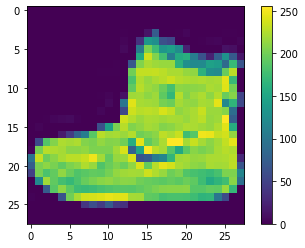

In [21]:
#View first image in X_train
plt.figure()
plt.imshow(X_train[0])
plt.colorbar()
#The color bar is showing the pixel values in the range 0----->255
# IN X-Axis,Y-axis the values are 28*28 meaning
#The image is represented in 28*28 matrice with pixel values ranging between 0---255

In [22]:
#To know what it is let us check the first label
y_train[0]
#9	Ankle boot

9

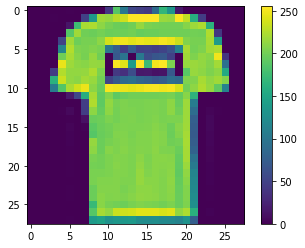

In [23]:
#View second image in X_train
plt.figure()
plt.imshow(X_train[1])
plt.colorbar()

In [24]:
#To know what it is let us check the second label
y_train[1]
#0	T-shirt/top

0

In [25]:
#Since, Neural Network Model doesn't take values more than 1
#The image pixel values are represented between the values 0 and 255
#We will bring this window to somewhere between zero and one
#So we divide the pixel values by 255
#This is performed on the entire dataset i.e. X_train,X_test
#Bring down the value of X_train to the range 0---->1
X_train=X_train/255.0

In [26]:
#Bring down the value of X_test to the range 0---->1
X_test=X_test/255.0

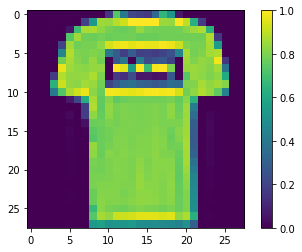

In [27]:
# Now, let us view the same figure
plt.figure()
plt.imshow(X_train[1])
plt.colorbar()
#We notice the image is same. But, the color bar calibration changed
#from 0---->255 to 0---->1

# Model Building

In [28]:
#Code for Neural Network Layers
#import the keras and sequential layers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense

In [29]:
#We pass the layers to the sequential model
model=Sequential([
    
])

In [30]:
#Flatten Layer- 
###It transforms the 28*28 matrice to 1-D
###So that it can be fed to next layer

#Dense Layer
###Units is number of neurons that we want
###We are passing 128 neurons in the first layer
###Activation function we are using here is relu

#Output Layer
### We have 10 classes, so there will be 10 neurons
###Activation function we use here is softmax
model=Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [31]:
#Model Summary
model.summary()
#Output of flatten layer is 784. This is because the 28*28 is converted into a single dimension
#This is fed to the dense layer containing 128 neurons. The output here will be 128*784
#The output layer is having 10 neurons. So 10*128 approx 1290 results

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


# Model Compile
- Loss Function: 
    - Measure how accurate is the model during     training and testing
    - Loss function minimises error during the training
    - Then testing error also will be minimized(not always true)
    - Because, if the model is overfit, overall loss will be minimized during training, but the loss increases during testing
    - So, this is where optimizer comes
- Optimizer
- Metrics

In [32]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

# Train the model

In [33]:
#Pass the batch size
#Create a history variable to store the loss and accuracy of the epochs
#Check if the model is overfitting or not by passing a validation_set parameter
history=model.fit(X_train,y_train,epochs=10,batch_size=10,validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 11s 232us/sample - loss: 0.4961 - accuracy: 0.8241 - val_loss: 0.4137 - val_accuracy: 0.8501
Epoch 2/10
48000/48000 [==============================] - 11s 219us/sample - loss: 0.3735 - accuracy: 0.8637 - val_loss: 0.3891 - val_accuracy: 0.8506
Epoch 3/10
48000/48000 [==============================] - 10s 207us/sample - loss: 0.3391 - accuracy: 0.8739 - val_loss: 0.3761 - val_accuracy: 0.8658
Epoch 4/10
48000/48000 [==============================] - 9s 195us/sample - loss: 0.3152 - accuracy: 0.8841 - val_loss: 0.3563 - val_accuracy: 0.8751
Epoch 5/10
48000/48000 [==============================] - 10s 208us/sample - loss: 0.2957 - accuracy: 0.8892 - val_loss: 0.3356 - val_accuracy: 0.8811
Epoch 6/10
48000/48000 [==============================] - 9s 196us/sample - loss: 0.2833 - accuracy: 0.8941 - val_loss: 0.3319 - val_accuracy: 0.8800
Epoch 7/10
48000/48000 [======================

# Model Evaluation

In [34]:
#Accuracy of test data
test_loss,test_acc=model.evaluate(X_test,y_test)
print(test_acc)
#During training, the accuracy was 91.03%
#In the testing, the accuracy is 88.32% which is ok
#This shows overfitting of our model
#This is a very simple single layer Neural Network Model
#Single hidden layer with 128 neurons

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.8789


# Prediction

In [35]:
from sklearn.metrics import accuracy_score

In [36]:
y_pred=model.predict_classes(X_test)

In [37]:
accuracy_score(y_test,y_pred)

0.8789

In [38]:
#Here we are predicting the class of the output and not an entire image as output
y_pred

array([9, 2, 1, ..., 8, 1, 5], dtype=int64)

In [39]:
#Make prediction on a random test image
pred=model.predict(X_test)

In [40]:
pred

array([[3.23878950e-08, 1.01274969e-11, 1.13367760e-09, ...,
        5.13737928e-03, 1.05546694e-09, 9.94850457e-01],
       [4.76895511e-05, 2.07109872e-12, 9.98007715e-01, ...,
        5.31711601e-20, 3.99285910e-14, 5.40197735e-14],
       [2.05060038e-10, 1.00000000e+00, 1.14881372e-21, ...,
        4.00697900e-32, 7.95703711e-11, 4.05718659e-30],
       ...,
       [1.26398774e-07, 4.88183678e-14, 2.45904497e-09, ...,
        7.20778536e-15, 9.99999285e-01, 2.55565950e-18],
       [1.03685364e-13, 9.99999762e-01, 3.65938887e-19, ...,
        2.02380309e-23, 1.89749083e-09, 1.44145638e-22],
       [4.64652004e-07, 8.50265767e-13, 2.14903508e-08, ...,
        2.21055700e-03, 1.52237641e-04, 2.17428237e-06]], dtype=float32)

In [41]:
pred[0]
#The maximum value is at the last place 9.8893982 e-01
#So, the probability of the item present in pred[0] belonging to
#last class i.e. class 9 is high when compared to other classes

array([3.2387895e-08, 1.0127497e-11, 1.1336776e-09, 9.6188307e-17,
       7.5131646e-12, 1.2153335e-05, 1.0859387e-09, 5.1373793e-03,
       1.0554669e-09, 9.9485046e-01], dtype=float32)

In [42]:
#Instead of we going through the results manually and indentifying 
#the location that is having maximum value in the above result
#let us use argmax, to identify which location in the above output is having
#maximum value
#zero is repering to the model predicted calss of first image
np.argmax(pred[0])

9

In [43]:
#Model predicted class of second image in the test set
np.argmax(pred[1])

2

# Plotting Learning Curve

In [44]:
#Know what the model is 
help(model)

Help on Sequential in module tensorflow.python.keras.engine.sequential object:

class Sequential(tensorflow.python.keras.engine.training.Model)
 |  Sequential(layers=None, name=None)
 |  
 |  Linear stack of layers.
 |  
 |  Arguments:
 |      layers: list of layers to add to the model.
 |  
 |  Example:
 |  
 |  ```python
 |  # Optionally, the first layer can receive an `input_shape` argument:
 |  model = Sequential()
 |  model.add(Dense(32, input_shape=(500,)))
 |  # Afterwards, we do automatic shape inference:
 |  model.add(Dense(32))
 |  
 |  # This is identical to the following:
 |  model = Sequential()
 |  model.add(Dense(32, input_dim=500))
 |  
 |  # And to the following:
 |  model = Sequential()
 |  model.add(Dense(32, batch_input_shape=(None, 500)))
 |  
 |  # Note that you can also omit the `input_shape` argument:
 |  # In that case the model gets built the first time you call `fit` (or other
 |  # training and evaluation methods).
 |  model = Sequential()
 |  model.add(Dens

In [45]:
#What does history object contain?
#A `History` object. Its `History.history` attribute is
#a record of training loss values and metrics values
#at successive epochs, as well as validation loss values
#and validation metrics values (if applicable).
#Create a variable history and put it during the training
#Let us view what is present in the history object
history

In [46]:
history.history

{'loss': [0.4961219216359314,
  0.37346435432118597,
  0.3390579451300922,
  0.315205386816815,
  0.2956855457732551,
  0.28334606439305693,
  0.2696839975810023,
  0.25896558982697265,
  0.24883726759692118,
  0.2427561691520547],
 'accuracy': [0.8240625,
  0.86366665,
  0.8739375,
  0.884125,
  0.8892083,
  0.8940833,
  0.899625,
  0.90302086,
  0.90704167,
  0.9088333],
 'val_loss': [0.41369741985186315,
  0.38914224406393866,
  0.3760621394403279,
  0.3563125035003759,
  0.3356260175133745,
  0.3319420175283449,
  0.3630257755310352,
  0.35684965420543446,
  0.32474802005269643,
  0.346316936424361],
 'val_accuracy': [0.85008335,
  0.8505833,
  0.86575,
  0.8750833,
  0.8810833,
  0.88,
  0.8735,
  0.87558335,
  0.88441664,
  0.8846667]}

In [47]:
type(history.history)

dict

In [48]:
#import necessary packages for plotting
import matplotlib.pyplot as plt

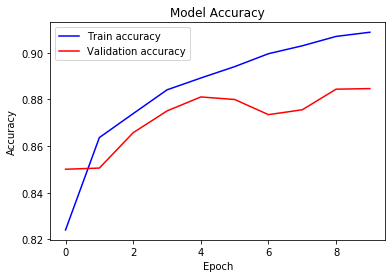

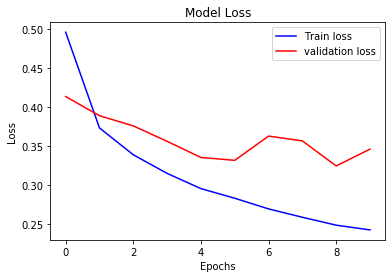

In [55]:
#Check if the model is overfitting or not by passing a validation_set parameter
#When training accuracy is more than the validation accuracy, then model is overfitting
#If we take a look at the learning curve


#Plot Model accuracy for training data
plt.plot(history.history['accuracy'],color='blue')
plt.plot(history.history['val_accuracy'],color='red')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train accuracy','Validation accuracy'],loc='upper left')
plt.show()

#plot Model Loss for Training data
plt.plot(history.history['loss'],color='blue')
plt.plot(history.history['val_loss'],color='red')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train loss','validation loss'],loc='upper right')
plt.show()

## Plot Confusion Matrix

In [59]:
#Open Anaconda Command Prompt in Administrator mode
#pip install mlxtend
#Or install it here in jupyter itself by executing the below command
#!pip install mlxtend
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

(<Figure size 576x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x22dcab80cc8>)

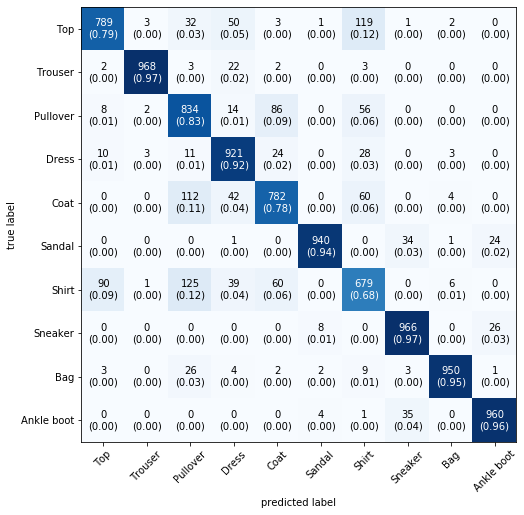

In [67]:
#Store the confusion matrix in a variable
mat=confusion_matrix(y_test,y_pred)
#plot_confusion_matrix(conf_mat=mat)

#Increase the size of the confusion matrix
#plot_confusion_matrix(conf_mat=mat,figsize=(8,8))

#Print the classes name as well
#plot_confusion_matrix(conf_mat=mat,figsize=(8,8),class_names=class_names)

#Print accuracy of each class
plot_confusion_matrix(conf_mat=mat,figsize=(8,8),class_names=class_names,show_normed=True)

(<Figure size 576x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x22dcaf86888>)

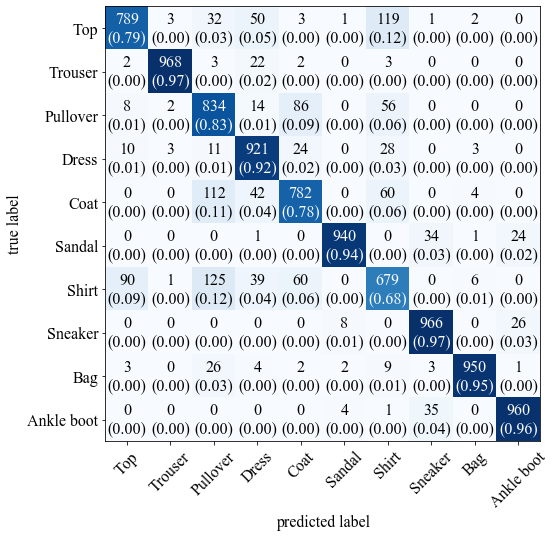

In [68]:
#Change the font,width of the boxes to bold and times new roman
import matplotlib


#Create a dictionary of fonts
font={
    'family':'Times New Roman',
    'weight':'bold',
    'size':16
}
matplotlib.rc ('font',**font)
mat=confusion_matrix(y_test,y_pred)

#Print accuracy of each class
plot_confusion_matrix(conf_mat=mat,figsize=(8,8),class_names=class_names,show_normed=True)

(<Figure size 576x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x22dcb0c6248>)

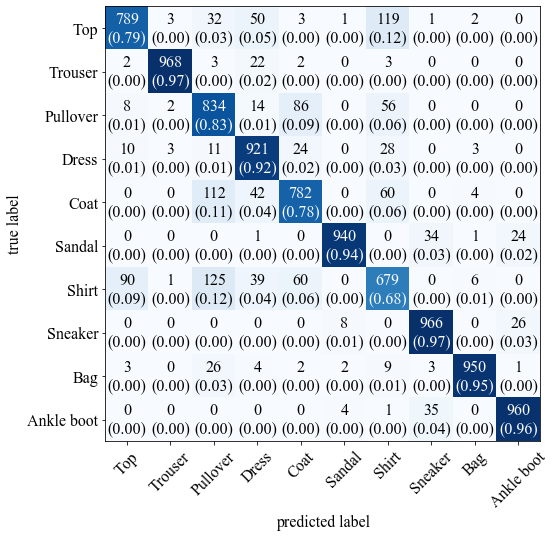

In [69]:
#Change the font,width of the boxes to times new roman+
#We are removing the bold
import matplotlib


#Create a dictionary of fonts
font={
    'family':'Times New Roman',
    'size':16
}
matplotlib.rc ('font',**font)
mat=confusion_matrix(y_test,y_pred)

#Print accuracy of each class
plot_confusion_matrix(conf_mat=mat,figsize=(8,8),class_names=class_names,show_normed=True)